# 第一步：数据准备

Wine（葡萄酒）数据集是一个经典的机器学习数据集，用于分类任务。这个数据集是由美国加州大学欧文分校的计算机科学系的许多年前收集的。该数据集由13个特征组成，描述了三个不同种类的葡萄酒。这三个类别分别是不同来源的葡萄酒，通常被标记为类别0、1和2。

这个数据一共有178行（代表有178个样本）,14 列（代表有13个特征+1列是标签）

## 数据读取

In [1]:
import pandas as pd

#读取数据为dataframe格式
df = pd.read_csv('wine_data.csv')
# 查看数据的前几行，默认显示前5行
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 数据探索

In [2]:
# 显示数据集的形状，即数据集中样本的数量和特征的数量。从结果可以看出，这个数据一共有178行（代表有178个样本）,14 列（代表有13个特征+1列是标签）
df.shape

(178, 14)

In [3]:
#也可以看出，一共有三类
df["target"].unique()

array([0, 1, 2], dtype=int64)

In [4]:
# 显示数据集中数值型特征的统计摘要，包括均值、标准差、最小值、25%分位数、中位数、75%分位数和最大值。
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## 划分训练集和验证集

In [5]:
# 数据集中包含特征和目标变量，要把他们划分开

# 特征矩阵，不包含目标变量。df中去除target列以外的列就是特征。
X = df.drop('target', axis=1) 

# df的target列是目标变量
y = df['target']

In [6]:
 # 导入train_test_split函数，用于划分训练集和验证集
from sklearn.model_selection import train_test_split 



In [7]:
#划分训练集和验证集，将数据集分为训练集（80%）和验证集（20%）
# test_size=0.2 这个参数就代表20%的样本做验证集
# random_state参数设置随机数种子，保证每次切分运行结果一致。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 模型训练

In [8]:
 # 导入准确率和分类报告指标
from sklearn.metrics import accuracy_score, classification_report 


## 逻辑回归 （Logistic Regression，LR）

### 先训练一遍模型

In [9]:
from sklearn.linear_model import LogisticRegression  # 导入LogisticRegression模型

# 初始化逻辑回归模型
model = LogisticRegression(max_iter=5000)

# 在训练集上训练模型
model.fit(X_train, y_train)

# 在验证集上进行预测
y_pred = model.predict(X_test)

# 计算模型准确率
# y_test: 这是验证集的真实标签
# y_pred: 这是刚才逻辑回归模型对验证集中每个样本的预测类别。
# 将真实标签 y_test和 模型预测类别 y_pred 输入到从sklearn中导入的accuracy_score函数中，计算准确率。
accuracy = accuracy_score(y_test, y_pred)
print("逻辑回归模型准确率：", accuracy)

# 打印分类报告，包括精确率、召回率、F1分数等指标
#在下一节，决策树中，我展开解释了这个分类报告的含义。
print("\n逻辑回归分类报告：")
print(classification_report(y_test, y_pred))

逻辑回归模型准确率： 1.0

逻辑回归分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### 混淆矩阵

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


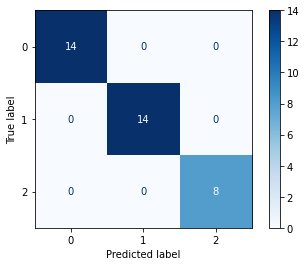

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# 打印混淆矩阵
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# 显示混淆矩阵
print(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# 混淆矩阵（Confusion Matrix）用于评估机器学习分类模型性能的表。
# 它展示在验证数据中，模型的预测结果与实际结果之间的对应关系。
# 混淆矩阵的每一行代表实际的类别，每一列代表预测的类别。
# 拿第一行举例子，实际为第0类的样本（true label =0）中，
# 14个样本正确预测为第0类（真正例），0个样本错误预测为第1类，0个样本错误预测为第2类
# 这说明全预测对了

## 线性模型

https://www.doubao.com/thread/wd2e6c4e5de4e56f0
协方差矩阵是一个统计量，用于衡量多个变量之间的线性关系。对于多变量的情况，协方差矩阵可以表示为一个方阵，其中每个元素是两个变量之间的协方差。

假设你有多维随机变量 $ \( X = (X_1, X_2, ..., X_n) \) $，其中 \( X_i \) 是随机变量，\( n \) 是变量的数量。要计算协方差矩阵，你可以按照以下步骤进行：

1. **计算均值**：首先，计算每个变量的均值（平均值）。

\[ \mu_i = \frac{1}{m} \sum_{j=1}^{m} x_{ij} \]

其中 \( m \) 是观测值的数量，\( x_{ij} \) 是第 \( j \) 个观测的第 \( i \) 个变量的值。

2. **计算协方差**：然后，计算每对变量之间的协方差。协方差可以通过以下公式计算：

\[ \text{Cov}(X_i, X_k) = \frac{1}{m-1} \sum_{j=1}^{m} (x_{ij} - \mu_i)(x_{kj} - \mu_k) \]

其中 \( \text{Cov}(X_i, X_k) \) 是变量 \( X_i \) 和 \( X_k \) 之间的协方差。

3. **构建协方差矩阵**：最后，将所有协方差值放入一个 \( n \times n \) 的矩阵中，其中 \( n \) 是变量的数量。矩阵的对角线元素是每个变量自身的方差，非对角线元素是不同变量之间的协方差。

\[ \Sigma = \begin{bmatrix}
\text{Var}(X_1) & \text{Cov}(X_1, X_2) & \cdots & \text{Cov}(X_1, X_n) \\
\text{Cov}(X_2, X_1) & \text{Var}(X_2) & \cdots & \text{Cov}(X_2, X_n) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(X_n, X_1) & \text{Cov}(X_n, X_2) & \cdots & \text{Var}(X_n)
\end{bmatrix} \]

其中 \( \text{Var}(X_i) \) 是变量 \( X_i \) 的方差，等于 \( \text{Cov}(X_i, X_i) \)。

在实际应用中，可以使用统计软件或编程语言（如Python）中的库函数来计算协方差矩阵。例如，在Python中，可以使用NumPy库的 `np.cov()` 函数来计算。

```python
import numpy as np

# 假设data是一个二维数组，每一列代表一个变量
data = np.array([[1, 2], [3, 4], [5, 6]])

# 计算协方差矩阵
cov_matrix = np.cov(data, rowvar=False)
print(cov_matrix)
```

在这个例子中，`rowvar=False` 参数表示数据的每一列代表一个变量，而不是每一行。如果每一行代表一个变量，则应该设置 `rowvar=True`。



## 决策树（Decision Tree，DT）

### 先训练一遍模型

In [11]:
from sklearn.tree import DecisionTreeClassifier

# 决策树模型
# 可以调整的参数有：
    # max_depth: 决策树的最大深度，用于控制树的复杂度。默认值：None，还可以试试 10, 15。限制max_depth，可以防止模型在训练集上过度学习。
    # min_samples_split: 节点分裂的最小样本数，也就是限制节点再划分所需的最小样本数，用于控制过拟合，默认值：2。增加min_samples_split，可以防止模型过于复杂，提高泛化能力。
    # min_samples_leaf: 默认值：1，叶子节点的最小样本数，用于控制过拟合，可以尝试2, 5, 10等。增加min_samples_leaf，可以防止模型对训练数据中的噪声过于敏感。
# 大家可以试试换一下这些参数后，对最后的预测结果有什么影响



dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=2,random_state=42)

# 在训练集上训练决策树模型
dt_model.fit(X_train, y_train)

# 用刚才训练好的名字叫dt_model的决策树模型，在验证集上进行预测
y_pred = dt_model.predict(X_test)


# 计算模型准确率
# y_test: 这是验证集的真实标签
# y_pred: 这是刚才决策树模型对验证集中每个样本的预测类别。
# 将真实标签 y_test和 模型预测类别 y_pred 输入到从sklearn中导入的accuracy_score函数中，计算准确率。
# 也就是说，计算准确率，不用自己写代码，调用这个accuracy_score函数就可以了
accuracy = accuracy_score(y_test, y_pred)
print("决策树模型准确率：", accuracy)

# 打印分类报告，包括精确率、召回率、F1分数等指标
print("\n决策树分类报告：")
print(classification_report(y_test, y_pred))



决策树模型准确率： 0.9444444444444444

决策树分类报告：
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



### ID3和C4.5的决策边界
这段代码首先生成一个双月形数据集，然后分别使用 ID3（以信息熵为划分标准）和类似 C4.5 的决策树算法进行训练，并绘制它们在该数据集上的决策边界。请注意，在 scikit-learn 中并没有直接实现 ID3 和 C4.5 算法，但可以通过设置决策树分类器的criterion参数为entropy来模拟类似的效果。

#### scikit-learn中的决策树算法简介

在 `scikit-learn` 中，决策树算法是一种强大的机器学习算法，主要用于分类和回归问题。

**一、主要特点**

1. 直观易懂
   - 决策树可以生成易于理解的规则，类似于人类的决策过程。通过对特征的逐步划分，最终形成一个树状结构，从根节点到叶节点的路径可以解释为一个决策规则。
   - 这使得决策树在一些需要可解释性的场景中非常有用，例如医疗诊断、金融风险评估等。

2. 处理多种类型的数据
   - 可以处理数值型和类别型数据，无需对数据进行特殊的预处理。
   - 对于缺失值也有一定的处理能力，可以通过设置参数来决定如何处理缺失值。

3. 速度快
   - 训练和预测速度相对较快，特别是对于小型和中型数据集。
   - 这使得决策树在实时应用和大规模数据处理中具有一定的优势。

**二、关键参数**

1. `criterion`
   - 用于选择划分特征的标准。常见的有 `"gini"`（基尼不纯度）和 `"entropy"`（信息熵）。
   - 如果是分类问题，默认是 `"gini"`，它衡量了数据集中类别分布的不纯度。信息熵也是一种不纯度的度量方法，通常在数据集中类别分布不均衡时可能会表现更好。

2. `max_depth`
   - 限制决策树的最大深度。如果不设置，决策树可能会过度生长，导致过拟合。
   - 通过设置合适的最大深度，可以控制模型的复杂度，防止过拟合。

3. `min_samples_split`
   - 决定一个节点是否需要进一步划分的最小样本数。如果一个节点中的样本数小于这个值，该节点将不再进行划分。
   - 增加这个值可以防止决策树对噪声数据过度敏感，减少过拟合的风险。

4. `min_samples_leaf`
   - 一个叶子节点所需的最小样本数。如果划分后导致叶子节点中的样本数小于这个值，那么这次划分将被放弃。
   - 这个参数可以避免生成过小的叶子节点，提高模型的稳定性和泛化能力。

**三、应用场景**

1. 分类问题
   - 例如图像分类、文本分类等。可以通过决策树对不同的特征进行划分，从而将数据分为不同的类别。
   - 在多分类问题中，决策树也可以表现出较好的性能。

2. 回归问题
   - 对于连续值的预测，决策树可以通过对特征空间的划分来拟合目标变量。
   - 可以用于房价预测、销售预测等场景。

3. 特征选择
   - 决策树在构建过程中会自动选择重要的特征进行划分。可以通过观察决策树的结构，了解哪些特征对预测结果的影响较大。
   - 这对于特征工程非常有帮助，可以筛选出重要的特征，提高模型的性能。

总之，`scikit-learn` 中的决策树算法是一种功能强大、灵活易用的机器学习算法，适用于各种分类和回归问题。通过合理调整参数，可以提高模型的性能和泛化能力，同时也可以利用其可解释性来更好地理解数据和预测结果。

#### ID#
提示词：基于scikit-learn库模拟ID3

在 `scikit-learn` 中并没有直接实现 ID3 算法，但可以通过设置决策树的一些参数来模拟类似 ID3 的行为。

**一、ID3 算法简介**

ID3（Iterative Dichotomiser 3）算法是一种经典的决策树算法，它以信息增益为特征选择的标准来构建决策树。具体步骤如下：
1. 计算每个特征的信息增益。信息增益是指在划分数据之前和之后，信息熵的减少量。信息熵用来衡量数据的混乱程度，信息熵越小，数据的纯度越高。
2. 选择信息增益最大的特征作为当前节点的划分特征。
3. 对划分后的每个子节点，重复上述步骤，直到满足停止条件（如所有样本属于同一类别、没有更多特征可供选择等）。

**二、在 `scikit-learn` 中模拟 ID3**

虽然 `scikit-learn` 没有专门的 ID3 实现，但可以通过以下方式近似模拟：
1. 设置决策树的 `criterion='entropy'`，这使得决策树在选择划分特征时使用信息熵作为标准，与 ID3 类似。
2. 不设置 `max_depth` 等限制树深度的参数，让决策树尽可能地生长，类似于 ID3 不断进行特征划分直到满足停止条件。

以下是一个示例代码：

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建决策树模型，模拟 ID3
id3_model = DecisionTreeClassifier(criterion='entropy')
id3_model.fit(X_train, y_train)

# 可视化决策树
plt.figure(figsize=(10, 8))
tree.plot_tree(id3_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

```

**三、局限性和注意事项**

1. 并非真正的 ID3
   - `scikit-learn` 中的决策树算法虽然可以通过设置参数模拟 ID3 的部分行为，但并不是完全等同于传统的 ID3 算法。在实际应用中，可能会有一些差异。
2. 过拟合风险
   - 像 ID3 这样不断以信息增益为标准进行划分，容易导致决策树过拟合训练数据。因此，在使用时需要注意适当调整参数，如设置 `max_depth`、`min_samples_split`、`min_samples_leaf` 等，以控制决策树的复杂度，防止过拟合。

总的来说，在 `scikit-learn` 中可以通过特定的参数设置来近似实现 ID3 算法的效果，但在使用时需要根据具体情况进行调整和优化，以获得更好的性能。

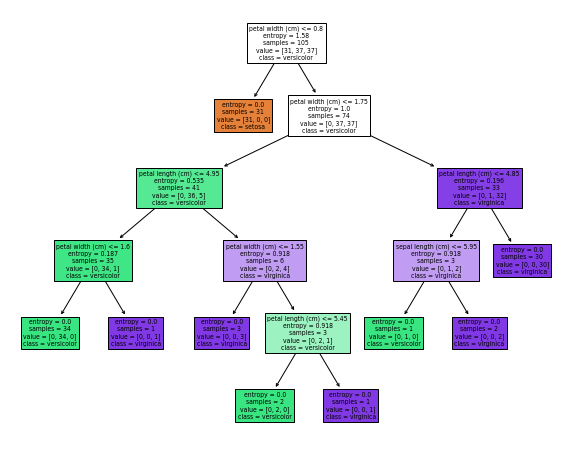

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建决策树模型，模拟 ID3
id3_model = DecisionTreeClassifier(criterion='entropy')
id3_model.fit(X_train, y_train)

# 可视化决策树
plt.figure(figsize=(10, 8))
tree.plot_tree(id3_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

在 `scikit-learn` 中没有直接实现 C4.5 算法，但可以通过设置一些参数来近似模拟其行为。

提示词：基于scikit-learn库模拟C4.5

**一、C4.5 算法简介**

C4.5 算法是在 ID3 算法的基础上进行改进的决策树算法。主要改进点包括：
1. 采用信息增益率（Gain Ratio）作为特征选择的标准，克服了 ID3 算法偏向于选择取值较多特征的问题。信息增益率考虑了信息增益和分裂信息（Split Information），对取值较多的特征进行惩罚。
2. 能够处理连续型特征，通过对连续特征进行离散化处理，将其转化为多个区间进行划分。
3. 进行后剪枝操作，降低过拟合的风险。

**二、在 `scikit-learn` 中模拟 C4.5**

虽然 `scikit-learn` 没有专门的 C4.5 实现，但可以通过以下方式近似模拟：
1. 设置决策树的 `criterion='entropy'`，使得决策树在选择划分特征时使用信息熵作为标准，与 C4.5 类似。同时，在一定程度上可以通过调整参数来控制决策树的生长，防止过拟合，类似于 C4.5 的后剪枝操作。例如，可以设置 `max_depth`（最大深度）、`min_samples_split`（最小分割样本数）、`min_samples_leaf`（最小叶子节点样本数）等参数。

以下是一个示例代码：

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建决策树模型，模拟 C4.5
c45_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5, min_samples_leaf=3)
c45_model.fit(X_train, y_train)

# 可视化决策树
plt.figure(figsize=(10, 8))
tree.plot_tree(c45_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

```

**三、局限性和注意事项**

1. 并非真正的 C4.5
   - `scikit-learn` 中的决策树算法只是在某些方面近似 C4.5，不能完全等同于真正的 C4.5 算法。在实际应用中，可能会有一些差异。
2. 参数调整的重要性
   - 为了更好地模拟 C4.5 的行为，需要合理调整参数。不同的数据集可能需要不同的参数组合，需要通过实验和验证来找到最合适的参数设置。
3. 处理连续特征的局限性
   - `scikit-learn` 的决策树算法对连续特征的处理方式与 C4.5 不完全相同。在实际应用中，如果需要处理连续特征，可以考虑其他方法或工具来进行更准确的离散化处理。

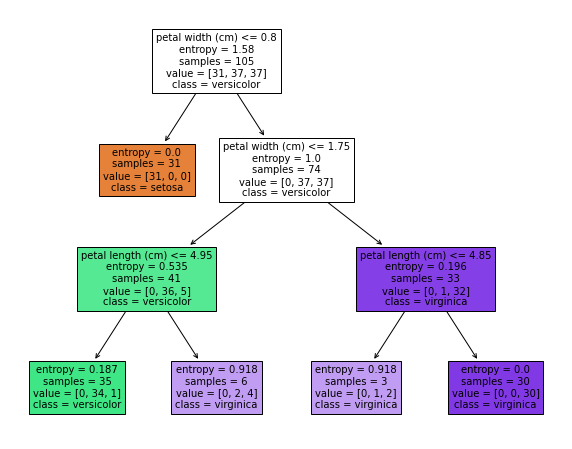

In [20]:
# 在iris数据集上训练C4.5
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建决策树模型，模拟 C4.5
c45_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5, min_samples_leaf=3)
c45_model.fit(X_train, y_train)

# 可视化决策树
plt.figure(figsize=(10, 8))
tree.plot_tree(c45_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

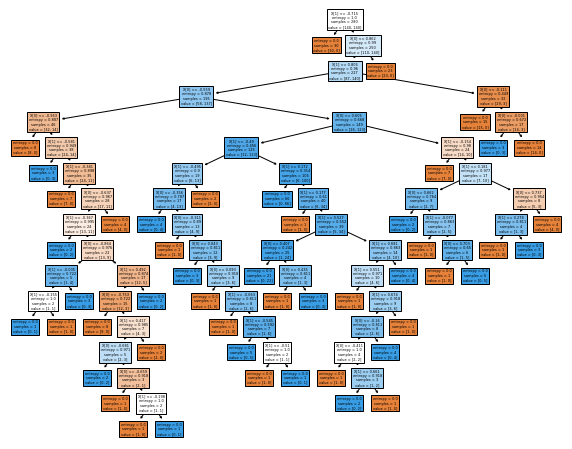

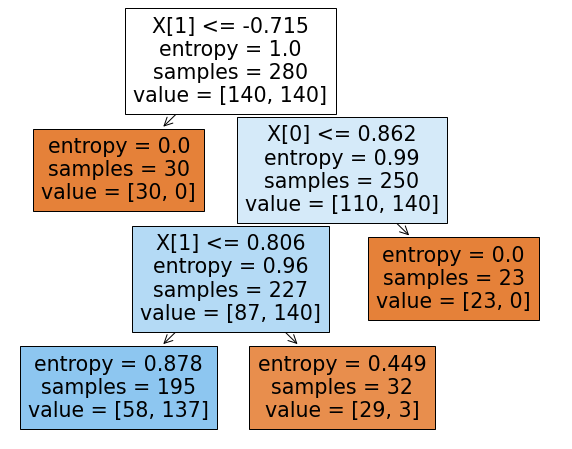

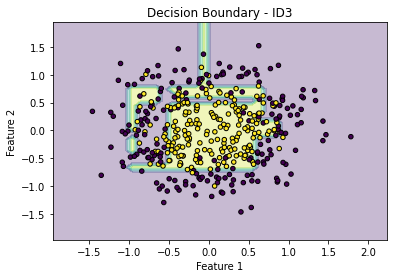

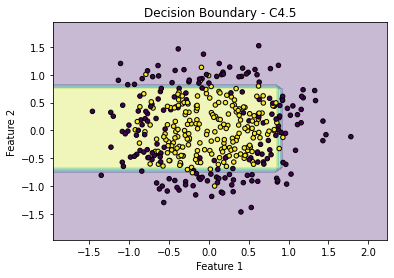

In [19]:
# 非矩形决策边界问题
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 生成具有非矩形决策边界的数据集（同心圆）
X, y = make_circles(n_samples=400, noise=0.25, factor=0.5, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建决策树模型，模拟 ID3
id3_model = DecisionTreeClassifier(criterion='entropy')
id3_model.fit(X_train, y_train)

# 可视化决策树
plt.figure(figsize=(10, 8))
tree.plot_tree(id3_model, filled=True)
plt.show()

# 创建决策树模型，模拟 C4.5
c45_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5, min_samples_leaf=3)
c45_model.fit(X_train, y_train)

# 可视化决策树
plt.figure(figsize=(10, 8))
tree.plot_tree(c45_model, filled=True)
plt.show()

# 绘制决策边界函数
def plot_decision_boundary(tree, X, y, title):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 绘制 ID3 决策边界
plot_decision_boundary(id3_model, X, y, 'Decision Boundary - ID3')

# 绘制 C4.5 决策边界
plot_decision_boundary(c45_model, X, y, 'Decision Boundary - C4.5')

### 混淆矩阵

[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


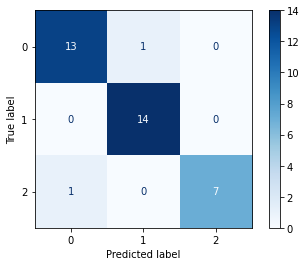

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# 打印混淆矩阵
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# 显示混淆矩阵
print(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


# 还是拿第一行举例子，实际为第一类的样本（true label =0）中，
# 13个样本正确预测为第0类（真正例），1个样本错误被预测为第1类，0个样本被错误预测为第2类
# 我们在学习的阶段会借助混淆矩阵来理解准确率，精确率等是如何计算的，
# 但是实际应用中，我们可以直接看分类报告给我们计算好的准确率，召回率，并不用自己去计算。

### 结果分析(后同）

* 精确率/查准率（Precision）：
    * 类别0（第一类葡萄酒）的精确率为0.93，表示在所有被模型预测为第一类葡萄酒的样本中，有93%确实属于第一类葡萄酒。
    * 类别1（第二类葡萄酒）的精确率为0.93，表示在所有被模型预测为第二类葡萄酒的样本中，有93%确实属于第二类葡萄酒。
    * 类别2（第三类葡萄酒）的精确率为1.00，表示在所有被模型预测为第三类葡萄酒的样本中，有100%确实属于第三类葡萄酒。
    * 在三个类别中，模型的精确率都相对较高，这说明模型对每个类别的分类都比较准确。
* 召回率/查全率（Recall）：
    * 类别0的召回率为0.93，表示在所有实际为第一类葡萄酒的样本中，有93%被模型正确地预测为第一类葡萄酒。
    * 类别1的召回率为1，表示在所有实际为第二类葡萄酒的样本中，有100%被模型正确地预测为第二类葡萄酒。
    * 类别2的召回率为0.88，表示在所有实际为第三类葡萄酒的样本中，有88%被模型正确地预测为第三类葡萄酒。
  
* F1分数（F1-score）：
    * F1分数是精确率和召回率的调和平均值，综合考虑了模型的分类准确度和漏报率。
    * 三个类别的F1分数都比较高，说明模型在各个类别上的性能都比较均衡。
* 支持数（Support）：
    * 支持数表示每个类别在验证集中的样本数量。在这个报告中，意思是，验证集中这三类的样本量分别为14、14和8。
* 准确率（Accuracy）：
    * 准确率是模型在所有预测中(无论哪一类)正确预测的比例.
    * 这个模型的准确率为0.94，说明总共有有94%的样本被模型正确地预测，说明模型在验证集上的整体性能比较好。


### 十折交叉验证

k折交叉验证（k-fold cross-validation）：

将数据集均匀地划分成k个子集，每个子集都有机会作为验证集，其余作为训练集。然后看K次的平均值和方差以衡量模型在k折交叉验证中的整体性能和稳定性。

一般来说K=10或者5,这里用K=10


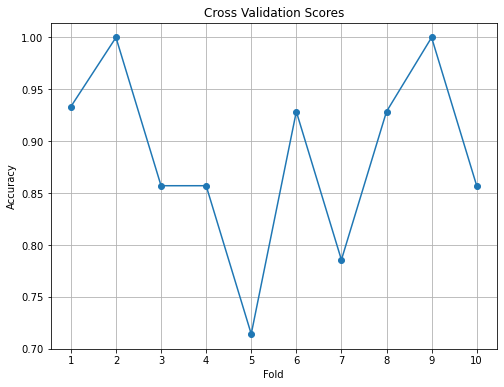

In [12]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 决策树 模型
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1)

# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(dt_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [13]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [0.93333333 1.         0.85714286 0.85714286 0.71428571 0.92857143
 0.78571429 0.92857143 1.         0.85714286]
这十次的准确率的均值是：
 0.8861904761904762


In [14]:
## 注意


可以看到如下图中的结果，每一次训练，换用不同的子集作为训练集，所得到的‘准确率”（纵轴），是有波动的。虽然第一次达到了100%的准确率，但是第三次就不是了。因此，不能因为看到了一个机器学习模型，在一个训练集上训练达到了100%的准确率，就认为这个机器学习模型是完美的，因为这里有一些“巧合”的成分。我们应该关注的是，在不用的训练集上，准确率都比较高的模型，比如，看十次的准确率的均值最高的模型。

## 随机森林（Random Forest，RF）

### 先训练一遍模型

In [15]:
from sklearn.ensemble import RandomForestClassifier

# 随机森林模型
# 可以调整的参数有：
#     n_estimators: 随机森林中树的数量，增加数量可以提高模型的稳定性和性能。默认值：100。
#     max_depth: 决策树的最大深度，用于控制树的复杂度。
#     min_samples_split: 节点分裂的最小样本数，用于控制过拟合。
#     min_samples_leaf: 叶子节点的最小样本数，用于控制过拟合。


# 大家可以试试换一下这些参数后，对最后的预测结果有什么影响
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
# 在训练集上训练随机森林模型
rf_model.fit(X_train, y_train)

# 用刚才训练好的名字叫rf_model的随机森林模型，在验证集上进行预测
rf_y_pred = rf_model.predict(X_test)

# 计算模型准确率
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("随机森林模型准确率：", rf_accuracy)

# 打印分类报告，包括精确率、召回率、F1分数等指标
print("\n随机森林分类报告：")
print(classification_report(y_test, rf_y_pred))

随机森林模型准确率： 1.0

随机森林分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



！！！可以看到 随机森林的各个指标都达到了 100%,说明这个方法表现优异！

In [17]:
# 可以打印预测值rf_y_pred和真实值y_test，看看是不是一样的
print("rf_y_pred",rf_y_pred)
print("y_test",y_test.values)

rf_y_pred [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
y_test [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]


### 十折交叉验证

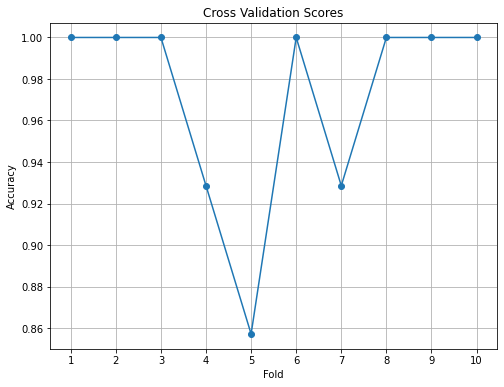

In [18]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 随机森林 模型
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [19]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [1.         1.         1.         0.92857143 0.85714286 1.
 0.92857143 1.         1.         1.        ]
这十次的准确率的均值是：
 0.9714285714285715


In [20]:
# 可以看出的是随机森林在十次的效果上都不错，效果比较稳定，这是一个好模型。

## 支持向量机（Support Vector Machine，SVM）

### 先训练一遍模型

In [21]:
from sklearn.svm import SVC
# 支持向量机模型
# 可以调整的参数有：
# C:正则化参数，默认值 1.0。
# 控制决策边界的软硬程度。C越大，决策边界越硬，容错性越低。
# 较小的C值（例如0.1）可以增加模型容错性，较大的C值（例如10）可以减小容错性。
# kernel:核函数的选择，决定数据映射到高维空间的方式，常用的有线性核、多项式核和径向基核（RBF）。
# 'linear'线性核适用于线性可分的情况，'rbf'适用于非线性可分的情况。


svm_model = SVC(C=1, kernel='rbf')

# 在训练集上训练支持向量机模型
svm_model.fit(X_train, y_train)

# 用刚才训练好的名字叫svm_model的svm模型，在验证集上进行预测
svm_y_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("\n支持向量机模型准确率：", svm_accuracy)
print("\n支持向量机分类报告：")
print(classification_report(y_test, svm_y_pred))


支持向量机模型准确率： 0.8055555555555556

支持向量机分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36



### 十折交叉验证

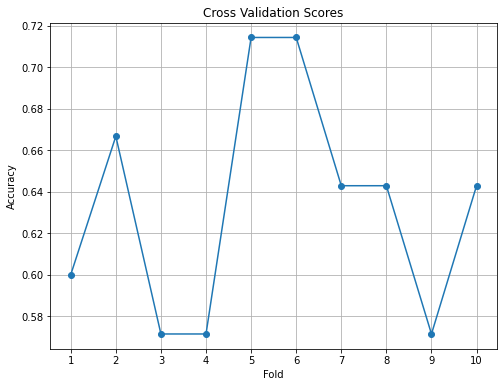

In [22]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 svm 模型
svm_model = SVC(C=1, kernel='rbf')

# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [23]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [0.6        0.66666667 0.57142857 0.57142857 0.71428571 0.71428571
 0.64285714 0.64285714 0.57142857 0.64285714]
这十次的准确率的均值是：
 0.6338095238095238


## KNN（K-Nearest Neighbors，KNN）

### 先训练一遍模型

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# K最近邻模型
# 可以调整的参数有：
#     n_neighbors: 选择最近邻的数量。
#     weights: 设置邻居的权重，可以是uniform（所有邻居权重相同）或distance（距离越近的邻居权重越大）。

knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("\nK最近邻模型准确率：", knn_accuracy)
print("\nK最近邻模型分类报告：")
print(classification_report(y_test, knn_y_pred))


K最近邻模型准确率： 0.7222222222222222

K最近邻模型分类报告：
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



### 十折交叉验证

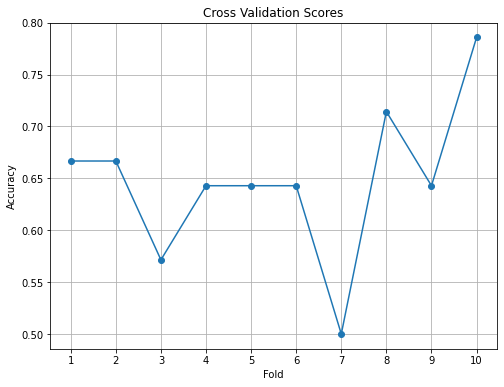

In [25]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 KNN 模型
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')


# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(knn_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [26]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [0.66666667 0.66666667 0.57142857 0.64285714 0.64285714 0.64285714
 0.5        0.71428571 0.64285714 0.78571429]
这十次的准确率的均值是：
 0.6476190476190476


可以看到KNN的效果非常不好

## 朴素贝叶斯（Naive Bayes Classifier，NB）

### 先训练一遍模型

In [27]:
from sklearn.naive_bayes import GaussianNB

# 朴素贝叶斯模型
nb_model = GaussianNB()

# 在训练集上训练朴素贝叶斯模型
nb_model.fit(X_train, y_train)

# 用训练好的朴素贝叶斯模型在验证集上进行预测
nb_y_pred = nb_model.predict(X_test)

# 计算模型准确率
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print("朴素贝叶斯模型准确率：", nb_accuracy)
print("\n朴素贝叶斯模型分类报告：")
print(classification_report(y_test, nb_y_pred))


朴素贝叶斯模型准确率： 1.0

朴素贝叶斯模型分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### 十折交叉验证

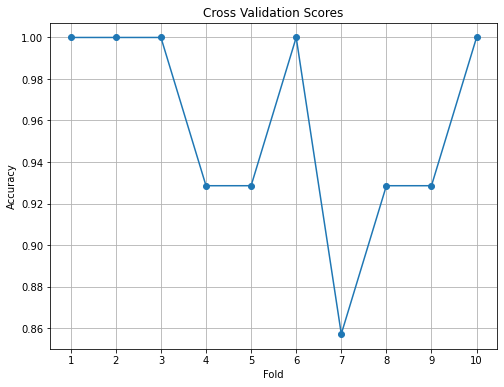

In [28]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 nb 模型
nb_model = GaussianNB()


# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(nb_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [29]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [1.         1.         1.         0.92857143 0.92857143 1.
 0.85714286 0.92857143 0.92857143 1.        ]
这十次的准确率的均值是：
 0.9571428571428571


## 梯度提升树（Gradient Boosting Trees，GBT）

### 先训练一遍模型

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# 梯度提升模型
# 可以调整的参数有：
#     learning_rate: 学习率，默认值：0.1。控制每次迭代的步长，也就是控制每次迭代的权重更新幅度。越小学的越精细，但时间也会更长。可以再试试0.001
#     n_estimators: 提升树的数量。默认值：100。调参思路：可以从较小的值开始，例如50，以加快模型训练。再逐步增加，找到一个合适的数量，避免过拟合。
#     max_depth: 每棵树的最大深度，默认值：3，尝试不同的深度值，可以调整模型的复杂度（越深越复杂），避免过拟合或者欠拟合。
gb_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

# 在训练集上训练梯度提升模型
gb_model.fit(X_train, y_train)

# 用训练好的梯度提升模型在验证集上进行预测
gb_y_pred = gb_model.predict(X_test)

# 计算模型准确率
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("梯度提升模型准确率：", gb_accuracy)
print("\n分类报告：")
print(classification_report(y_test, gb_y_pred))


梯度提升模型准确率： 0.9444444444444444

分类报告：
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.93      0.93      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



### 十折交叉验证

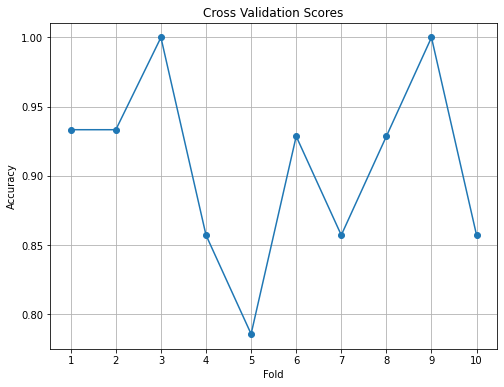

In [31]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 gbt 模型
gb_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(gb_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [32]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [0.93333333 0.93333333 1.         0.85714286 0.78571429 0.92857143
 0.85714286 0.92857143 1.         0.85714286]
这十次的准确率的均值是：
 0.9080952380952383


## 多层感知机模型（Multilayer Perceptron,MLP）

### 先训练一遍模型

In [57]:
from sklearn.neural_network import MLPClassifier

# 多层感知机模型（MLP）
# 可以调整的参数有：
#     hidden_layer_sizes: 隐藏层的大小。
#     activation: 激活函数的类型，如'relu'、'logistic'、'tanh'等。
#     solver: 优化算法的选择，如'adam'、'sgd'等。
#     max_iter:用于指定训练模型的最大迭代次数。当模型达到指定的最大迭代次数后，即使模型尚未收敛，训练也会停止。
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=3000,random_state=42)

# 在训练集上训练多层感知机模型
mlp_model.fit(X_train, y_train)

# 用训练好的多层感知机模型在验证集上进行预测
mlp_y_pred = mlp_model.predict(X_test)

# 计算模型准确率
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
print("多层感知机模型准确率：", mlp_accuracy)
print("\n多层感知机分类报告：")
print(classification_report(y_test, mlp_y_pred))


多层感知机模型准确率： 0.9722222222222222

多层感知机分类报告：
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



### 十折交叉验证

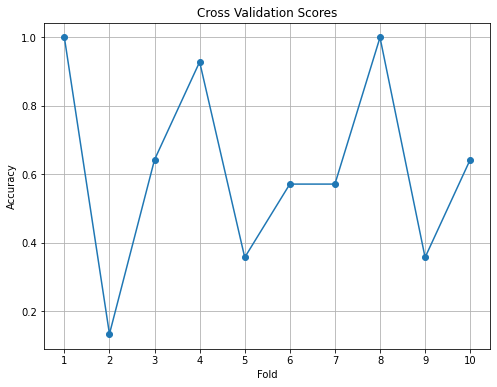

In [34]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 MLP 模型
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=2000)

# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(mlp_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [35]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [1.         0.13333333 0.64285714 0.92857143 0.35714286 0.57142857
 0.57142857 1.         0.35714286 0.64285714]
这十次的准确率的均值是：
 0.6204761904761905


## AdaBoost

### 先训练一遍模型

In [36]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost 模型
# 可以调整的参数有：
#     n_estimators: 弱学习器的数量。
#     learning_rate: 学习率，用于控制每个弱学习器的权重更新幅度。
adaboost_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)

# 在训练集上训练 AdaBoost 模型
adaboost_model.fit(X_train, y_train)

# 用训练好的 AdaBoost 模型在验证集上进行预测
adaboost_y_pred = adaboost_model.predict(X_test)

# 计算模型准确率
adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)
print("AdaBoost 模型准确率：", adaboost_accuracy)
print("\nAdaBoost 分类报告：")
print(classification_report(y_test, adaboost_y_pred))


AdaBoost 模型准确率： 0.9166666666666666

AdaBoost 分类报告：
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.82      1.00      0.90        14
           2       1.00      0.88      0.93         8

    accuracy                           0.92        36
   macro avg       0.94      0.91      0.92        36
weighted avg       0.93      0.92      0.92        36



### 十折交叉验证

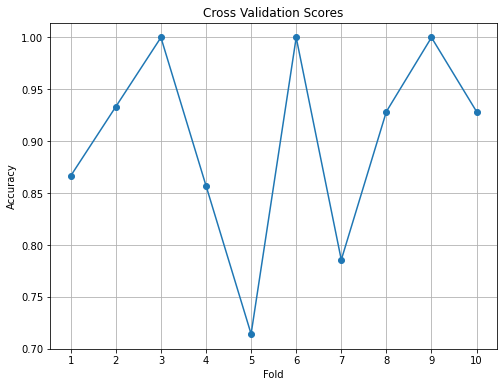

In [37]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 adaboost_model 模型
adaboost_model = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0)

# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(adaboost_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [38]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [0.86666667 0.93333333 1.         0.85714286 0.71428571 1.
 0.78571429 0.92857143 1.         0.92857143]
这十次的准确率的均值是：
 0.9014285714285715


## XGboost

### 先训练一遍模型

In [39]:
import xgboost as xgb

# XGBoost 模型
# 可以调整的参数有：
#     max_depth: 树的最大深度。
#     learning_rate: 学习率，用于控制每次迭代的步长。
#     n_estimators: 树的数量，也就是迭代次数。
#     objective: 损失函数的选择，常见的有'binary:logistic'（二分类）和'multi:softmax'（多分类）等。
#     eval_metric: 评估指标的选择，例如'error'、'logloss'等。
xgboost_model = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, objective='multi:softmax')

# 在训练集上训练 XGBoost 模型
xgboost_model.fit(X_train, y_train)

# 用训练好的 XGBoost 模型在验证集上进行预测
xgboost_y_pred = xgboost_model.predict(X_test)

# 计算模型准确率
xgboost_accuracy = accuracy_score(y_test, xgboost_y_pred)
print("XGBoost 模型准确率：", xgboost_accuracy)
print("\nXGBoost分类报告：")
print(classification_report(y_test, xgboost_y_pred))


XGBoost 模型准确率： 0.9722222222222222

XGBoost分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



### 十折交叉验证


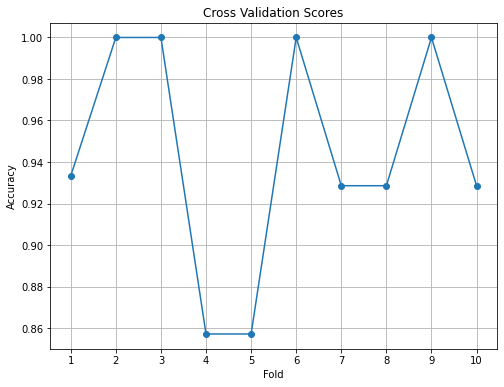

In [40]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 XGBoost 模型
xgboost_model = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, objective='binary:logistic')

# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(xgboost_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [41]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [0.93333333 1.         1.         0.85714286 0.85714286 1.
 0.92857143 0.92857143 1.         0.92857143]
这十次的准确率的均值是：
 0.9433333333333334


# 选一个表现较好的模型，作为最终的模型并预测

In [42]:
#训练一个机器学习模型，我们最终想要得到两个东西：
# 1.训练好的机器学习模型
# 2.在不知道标签的数据上，预测出标签。


# 这里我们没有真正的不知道标签的数据，但是我们假设验证集X_test的标签y_test是未知的，
# 用训练好的表现最好的机器学习模型对这部分数据进行预测，作为我们的结果。


## 预测结果

In [9]:
from sklearn.ensemble import RandomForestClassifier

# 定义随机森林模型
random_forest_model = RandomForestClassifier(n_estimators=100)

# 在训练集上训练随机森林模型
random_forest_model.fit(X_train, y_train)

# 在验证集上进行预测
random_forest_y_pred = random_forest_model.predict(X_test)

# 计算随机森林模型的准确率
random_forest_accuracy = accuracy_score(y_test, random_forest_y_pred)
print("随机森林模型准确率：", random_forest_accuracy)
print("\n随机森林分类报告：")
print(classification_report(y_test, random_forest_y_pred))
print("标准答案是",y_test.values)
print("最后在验证集上的预测结果是",random_forest_y_pred)

#可以看出，预测结果和标准答案一模一样，准确率达到了100%。

随机森林模型准确率： 1.0

随机森林分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

标准答案是 [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
最后在验证集上的预测结果是 [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]


## 保存模型

In [44]:
# 保存模型到文件
import joblib

# joblib 这个Python 库，用于储存数据，特别是涉及大量数据的机器学习模型。
joblib.dump(random_forest_model, 'random_forest_model.joblib')
# 把模型保存为一个名为random_forest_model.joblib的文件,就在这个文件夹下

# ”random_forest_model.joblib“这个文件中保存的是机器学习模型的属性和参数。
# 比如模型的结构、学习到的参数（例如，决策树的结构、支持向量机的支持向量等）


['random_forest_model.joblib']

## 重新读取训练好的模型

In [45]:
random_forest_model = joblib.load('random_forest_model.joblib')

# 使用加载的模型进行预测
loaded_rf_y_pred = random_forest_model.predict(X_test)

# 计算加载的模型准确率
loaded_rf_y_pred_accuracy = accuracy_score(y_test, loaded_rf_y_pred)
print("加载的随机森林模型准确率：", loaded_rf_y_pred_accuracy)


加载的随机森林模型准确率： 1.0


# 数据标准化及效果对比

## 什么是数据标准化

In [46]:
# 数据标准化/归一化是一种数据预处理方法。
# 数据标准化/归一化将数据调整为一定的范围
# 一般有两种：
# 1.缩到0到1之间（归一化）
# 2.让数据的均值为0，方差为1（标准化）


## 为什么要数据标准化

In [47]:
#标准化的目的是消除数据中的单位尺度差异，使得特征之间可以公平比较，同时也能加快某些算法的收敛速度。

## 什么机器学习算法，对数据标准化比较敏感

In [48]:
# 不是所有的机器学习方法对数据是否标准化都敏感。
# 比如，从上面的结果可以看出，基于树的算法（如决策树、随机森林和梯度提升机），在没有进行数据标准化的情况下，表现依旧很好。
# 这是因为，这些算法在做决策时主要考虑数据点的排序或分类而不是具体数值。

# 那么，什么机器学习算法，对数据是否标准化比较敏感呢？
# 总的来说，以下两类机器学习方法对数据是否标准化比较敏感。
# 1.基于梯度的方法，如神经网络。
# 2.基于距离的算法：如K-近邻（KNN）、支持向量机（SVM）。

# 为什么这两类算法对数据是否标准化敏感呢？
# 因为这两类算法对数据的尺度和分布非常敏感。
# 所以，这两类算法在数据标准化后，效果可能会有很大的提升。

# 从上面的代码中，我们可以看到，KNN和SVM的效果相较于决策树，并不好。
# 下面我将以SVM模型为例，展示，数据标准化后，SVM的效果会有很大的提升。
# 大家也可以试试，其他模型，在数据标准化后的效果。



## 数据标准化后的模型效果前后对比

### 数据标准化

In [49]:
# 通常使用Sklearn库中的StandardScaler对数据进行标准化(不用自己写公式的代码)
from sklearn.preprocessing import StandardScaler

# 初始化StandardScaler对象
scaler = StandardScaler()

# 用训练数据拟合scaler
scaler.fit(X_train)

# 转换训练集和验证集
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
#查看原来的数据
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


In [51]:
#查看标准化后的数据，可以看到，数据变成了均值为0，方差为1的数据
X_train_scaled

array([[ 1.66529275, -0.60840587,  1.21896194, ..., -1.65632857,
        -0.87940904, -0.24860607],
       [-0.54952506,  2.7515415 ,  1.00331502, ..., -0.58463272,
        -1.25462095, -0.72992237],
       [-0.74531007, -1.14354109, -0.93750727, ...,  0.35845962,
         0.2462267 , -0.24860607],
       ...,
       [ 1.714239  , -0.44172441,  0.06884503, ...,  1.04434496,
         0.56585166,  2.69572196],
       [-0.35374006, -0.7399965 , -0.36244882, ...,  0.01551695,
        -0.74044166, -0.79631083],
       [-0.78201975,  0.06709269,  0.35637426, ..., -0.67036839,
         1.09392769, -0.98551793]])

### 数据标准化后，SVM的效果

In [52]:
from sklearn.svm import SVC


svm_model = SVC(C=1, kernel='rbf')

# 在训练集上训练支持向量机模型
#注意，这里我已经把数据换成了标准化后的数据，X_train_scaled，而不是原来的X_train
svm_model.fit(X_train_scaled, y_train)

# 用刚才训练好的名字叫svm_model的svm模型，在验证集上进行预测
# 注意，这里我已经把验证数据换成了标准化后的数据，X_test_scaled，而不是原来的X_test
svm_y_pred = svm_model.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("\n数据标准化后的支持向量机模型准确率：", svm_accuracy)
print("\n数据标准化后的支持向量机分类报告：")
print(classification_report(y_test, svm_y_pred))


数据标准化后的支持向量机模型准确率： 1.0

数据标准化后的支持向量机分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



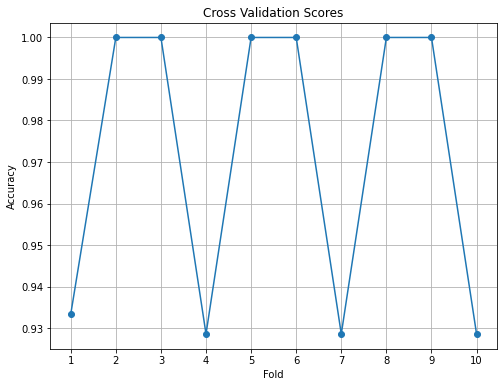

In [53]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 svm 模型
svm_model = SVC(C=1, kernel='rbf')

# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [54]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

## 可以看到，模型效果提升了非常多

这十次的准确率分别是：
 [0.93333333 1.         1.         0.92857143 1.         1.
 0.92857143 1.         1.         0.92857143]
这十次的准确率的均值是：
 0.971904761904762


### 让我们回忆一下，数据标准化之前SVM模型的效果

In [55]:
from sklearn.svm import SVC


svm_model = SVC(C=1, kernel='rbf')

# 在训练集上训练支持向量机模型
#注意，这里我已经是原来的X_train
svm_model.fit(X_train, y_train)

# 用刚才训练好的名字叫svm_model的svm模型，在验证集上进行预测
svm_y_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("\n未进行数据标准化的支持向量机模型准确率：", svm_accuracy)
print("\n未进行数据标准化的支持向量机分类报告：")
print(classification_report(y_test, svm_y_pred))


未进行数据标准化的支持向量机模型准确率： 0.8055555555555556

未进行数据标准化的支持向量机分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36

